<a href="https://colab.research.google.com/github/humayraR/fact-ai_Repl/blob/main/Result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import numpy as np

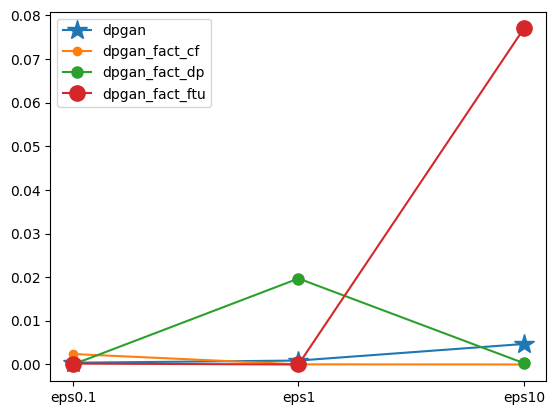

In [33]:
# Fairness
#ftu
# eps = [0.1,1,10]
eps = ["eps0.1", "eps1", "eps10"]
dp1 = [0.1479, 0.0204, 0.0119]
dp2 = [0.0004, 0.0009, 0.0047] #orig vs mod


dp_fact_ftu1 = [0.0016, 0.0012, 0.0239]
dp_fact_ftu2 = [0.0002, 0.0, 0.077]
dp_fact_dp1 = [0.0030, 0.1182, 0.0808]
dp_fact_dp2 = [0,0.0197, 0.0003]
dp_fact_cf1 = [0.0054, 0.0062,0.0007]
dp_fact_cf2 =  [0.0024, 0.00003, 0.0]

dp_decaf_ftu = [] # all 0 on mod(synth, orig)
dp_decaf_dp = []
dp_decaf_cf = []

# plot lines
plt.plot(eps, dp2, "-*", markersize=15, label = "dpgan")
plt.plot(eps, dp_fact_cf2, "-o", markersize=6, label = "dpgan_fact_cf")
plt.plot(eps, dp_fact_dp2, "-o", markersize=8, label = "dpgan_fact_dp")
plt.plot(eps, dp_fact_ftu2, "-o", markersize=11, label = "dpgan_fact_ftu")

plt.legend()
plt.show()




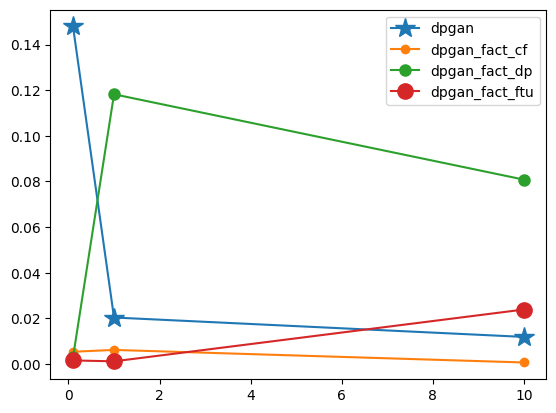

In [21]:
  #dp
dp = [0.0825, 0.0335, 0.0005][0.00107, -0.0018,-0.0046]
dp_fact_ftu = [0.0014, 0.0032, 0.0252][-0.0009, 0, 0.0002]
dp_fact_dp = [0.0029, 0.1263, 0.1367][0,-0.0105, 0.0002]
dp_fact_cf = [0.0057, 0.0076, 0.0022][0.0024, 0.0, 0.0]

dp_decaf_ftu = []
dp_decaf_dp = []
dp_decaf_cf = []



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, recall_score, roc_auc_score
def get_metrics(mode,df,synthetic):

    # Split the data into train,test
    traindf, testdf = train_test_split(df, test_size=0.3)
    X_train = traindf.loc[:, traindf.columns != 'label']
    y_train = traindf['label']
    X_test = testdf.loc[:, testdf.columns != 'label']
    y_test = testdf['label']

    clf_df = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                                     learning_rate='constant', learning_rate_init=0.001).fit(X_train, y_train)
    '''
    SYNTHETIC DATASET
    '''
    # Make sure the data is representative of the original dataset
    synthetic_balanced_1 = synthetic[synthetic.label == 1].sample(frac = 0.75)
    synthetic_balanced_0 = synthetic[synthetic.label == 0].sample(frac = 0.25)
    #synthetic_balanced = synthetic_balanced_1.append(synthetic_balanced_0)
    synthetic_balanced = pd.concat([synthetic_balanced_1, synthetic_balanced_0], ignore_index=True)

    # Split the data into train,test
    X_syn = synthetic_balanced.loc[:, synthetic_balanced.columns != 'label']
    y_syn = synthetic_balanced['label']

    y_pred_syn = clf_df.predict(X_syn)

    synthetic_pos = synthetic.assign(sex=0)
    synthetic_neg = synthetic.assign(sex=1)

    x_pos_syn = synthetic_balanced[synthetic_balanced['sex'] == 0].drop(['label'], axis = 1)[:7508]
    x_neg_syn = synthetic_balanced[synthetic_balanced['sex'] == 1].drop(['label'], axis = 1)[:7508]

    pos = clf_df.predict(synthetic_pos.drop('label',axis=1))
    neg = clf_df.predict(synthetic_neg.drop('label',axis=1))

    pred_pos_syn = clf_df.predict(x_pos_syn)
    pred_neg_syn = clf_df.predict(x_neg_syn)

    FTU = np.abs(np.mean(pos-neg))
    DP = np.mean(pred_pos_syn)-np.mean(pred_neg_syn)

    # Print the obtained statistics
    print('Statistics for dataset for mode:',mode)
    print('Precision:',precision_score(y_syn, y_pred_syn, average='binary'))
    print('Recall:',recall_score(y_syn, y_pred_syn, average='binary'))
    print('AUROC:',roc_auc_score(y_syn, y_pred_syn))
    print('FTU:',FTU)
    print('DP:',DP)